In [22]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import os

In [23]:
# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("Train : ", X_train.shape[0])
print("test : ", X_test.shape[0])

Train :  60000
test :  10000


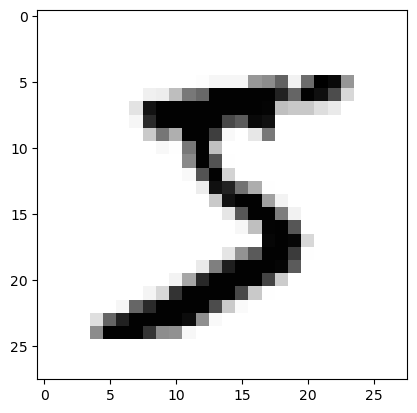

In [25]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i) # 왼쪽 정렬
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [6]:
print(X_train[0][0].shape)

(28,)


In [7]:
print(X_train[0].shape)

(28, 28)


In [8]:
X_train = X_train.reshape(X_train.shape[0], 28*28) # 그림하나를 펼친다.

In [9]:
print(type(X_train))

<class 'numpy.ndarray'>


In [10]:
print(X_train.dtype)

uint8


In [11]:
X_train = X_train.astype('float64')
X_train = X_train / 255 #0에서 1사이로 바뀜

In [12]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [14]:
# 타겟값 확인
print("Target", (y_train[0]))

Target 5


In [15]:
y_train = to_categorical(y_train) # import to_categorical
y_test = to_categorical(y_test)

In [16]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os

In [18]:
model = Sequential()
model.add(layers.Dense(512, input_dim=28*28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

modelpath = 'data/model/MNIST.hdf5'
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                             verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.25,
                   epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping, checkpoint])


Epoch 00001: val_loss improved from inf to 0.18783, saving model to data/model\MNIST.hdf5

Epoch 00002: val_loss improved from 0.18783 to 0.13471, saving model to data/model\MNIST.hdf5

Epoch 00003: val_loss improved from 0.13471 to 0.11837, saving model to data/model\MNIST.hdf5

Epoch 00004: val_loss improved from 0.11837 to 0.10699, saving model to data/model\MNIST.hdf5

Epoch 00005: val_loss improved from 0.10699 to 0.09435, saving model to data/model\MNIST.hdf5

Epoch 00006: val_loss improved from 0.09435 to 0.08582, saving model to data/model\MNIST.hdf5

Epoch 00007: val_loss improved from 0.08582 to 0.08413, saving model to data/model\MNIST.hdf5

Epoch 00008: val_loss did not improve from 0.08413

Epoch 00009: val_loss improved from 0.08413 to 0.08280, saving model to data/model\MNIST.hdf5

Epoch 00010: val_loss improved from 0.08280 to 0.08103, saving model to data/model\MNIST.hdf5

Epoch 00011: val_loss did not improve from 0.08103

Epoch 00012: val_loss did not improve from 0

In [20]:
print("\n Test Accuracy: " , model.evaluate(X_test, y_test)[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9819

 Test Accuracy:  0.9818999767303467


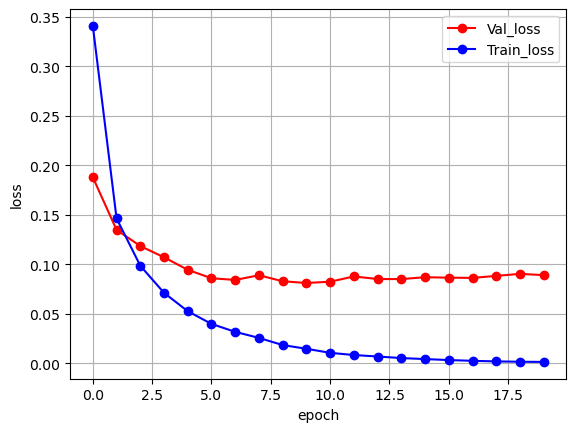

In [21]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='o', c="red", label='Val_loss')
plt.plot(x_len, y_loss, marker='o', c="blue", label='Train_loss')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()